In [ ]:
#memasukan library
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#memanggil dataset
data=sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

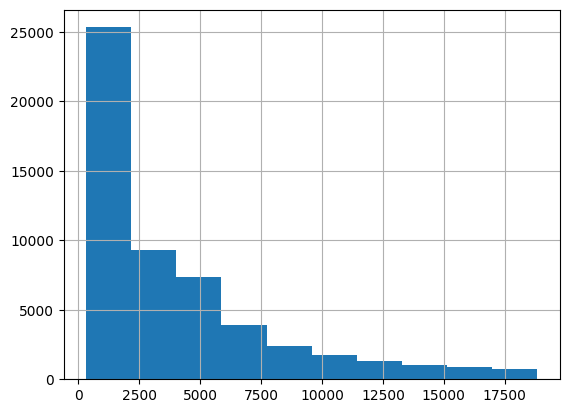

In [ ]:
#melihat diagram di kolom price
data['price'].hist()

<Axes: >

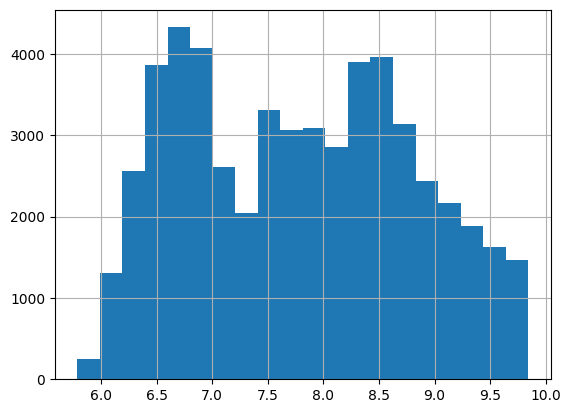

In [ ]:
log_price=data['price'].apply(np.log)
log_price.hist(bins=20)

In [ ]:
data['price'].apply(lambda x: np.log(x)+1)

0        6.786897
1        6.786897
2        6.789960
3        6.811141
4        6.814131
           ...   
53935    8.921898
53936    8.921898
53937    8.921898
53938    8.921898
53939    8.921898
Name: price, Length: 53940, dtype: float64

In [ ]:
#mengecek outlier
def outlier(x):
  q1,q3= x.quantile([0.25, 0.75])  # x is the entire Series here
  iqr =q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return (x < lower_bound) | (x > upper_bound)  # Vectorized comparison

data['nilai_outliers'] = outlier(data['price'])  # Apply to the whole Series
data['nilai_outliers']

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: nilai_outliers, Length: 53940, dtype: bool

In [ ]:
#menambahkan kolom
data[data['nilai_outliers']]

,carat,cut,color,clarity,depth,table,price,x,y,z,nilai_outliers
23820,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21,True
23821,2.08,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06,True
23822,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74,True
23823,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08,True
23824,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68,True
...,...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,True
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,True
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,True
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,True


In [ ]:
#min max skala
def min_max_scale(x):
  result=(x-x.min())/(x.max()-x.min())

  return result

In [ ]:
data[['price','carat']].apply(min_max_scale, axis=0)

,price,carat
0,0.000000,0.006237
1,0.000000,0.002079
2,0.000054,0.006237
3,0.000433,0.018711
4,0.000487,0.022869
...,...,...
53935,0.131427,0.108108
53936,0.131427,0.108108
53937,0.131427,0.103950
53938,0.131427,0.137214


In [ ]:
#modern
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
nilai=min_max.fit_transform(data[['price','carat']])
pd.DataFrame(nilai,columns=['price','carat'])


,price,carat
0,0.000000,0.006237
1,0.000000,0.002079
2,0.000054,0.006237
3,0.000433,0.018711
4,0.000487,0.022869
...,...,...
53935,0.131427,0.108108
53936,0.131427,0.108108
53937,0.131427,0.103950
53938,0.131427,0.137214


In [ ]:
#Scaler
def scaler(x):
  result=(x-x.mean()/x.std())

  return result

In [ ]:
data[['price','carat']].apply(scaler,axis=0)

,price,carat
0,325.014197,-1.453377
1,325.014197,-1.473377
2,326.014197,-1.453377
3,333.014197,-1.393377
4,334.014197,-1.373377
...,...,...
53935,2756.014197,-0.963377
53936,2756.014197,-0.963377
53937,2756.014197,-0.983377
53938,2756.014197,-0.823377


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
nilai=scaler.fit_transform(data[['price','carat']])
pd.DataFrame(nilai,columns=['price','carat'])

,price,carat
0,-0.904095,-1.198168
1,-0.904095,-1.240361
2,-0.903844,-1.198168
3,-0.902090,-1.071587
4,-0.901839,-1.029394
...,...,...
53935,-0.294731,-0.164427
53936,-0.294731,-0.164427
53937,-0.294731,-0.206621
53938,-0.294731,0.130927


In [ ]:
data['hapus']=data['cut'].astype('category')
data['hapus_nilai']=data['hapus'].cat.codes
data[['hapus','hapus_nilai']]

,hapus,hapus_nilai
0,Ideal,0
1,Premium,1
2,Good,3
3,Premium,1
4,Good,3
...,...,...
53935,Ideal,0
53936,Good,3
53937,Very Good,2
53938,Premium,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
cut_category=lr.fit_transform(data['cut'])
cut_category

array([2, 3, 1, ..., 4, 3, 2])

In [ ]:
#mengembalikan nilai semula
lr.inverse_transform(cut_category)

array(['Ideal', 'Premium', 'Good', ..., 'Very Good', 'Premium', 'Ideal'],
      dtype=object)

In [ ]:
pd.get_dummies(data['cut'],drop_first=True)

,Premium,Very Good,Good,Fair
0,False,False,False,False
1,True,False,False,False
2,False,False,True,False
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
53935,False,False,False,False
53936,False,False,True,False
53937,False,True,False,False
53938,True,False,False,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
nilai=one.fit_transform(data[['cut']])
pd.DataFrame(nilai.toarray())

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0
53936,0.0,1.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,0.0,1.0
53938,0.0,0.0,0.0,1.0,0.0
